In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_booking.csv',encoding='latin-1')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.sample(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
24814,2,Internet,RoundTrip,56,28,8,Sat,SGNSYD,Australia,1,0,0,8.58,0
15716,1,Internet,RoundTrip,5,59,13,Fri,JHBTPE,Malaysia,1,0,0,4.67,1
34873,1,Internet,RoundTrip,8,4,10,Wed,SGNSYD,Australia,0,0,1,8.58,0
48607,1,Internet,RoundTrip,59,6,12,Sun,LGKPER,Australia,1,0,0,5.62,0
34716,1,Internet,RoundTrip,152,4,9,Fri,PUSSIN,South Korea,0,0,0,6.33,0
33537,1,Internet,RoundTrip,4,4,16,Sun,KIXSIN,Japan,1,0,1,7.00,0
24020,2,Internet,RoundTrip,194,29,11,Thu,PERUTP,Australia,1,1,0,5.62,0
21107,1,Internet,RoundTrip,11,22,11,Wed,MNLPER,Australia,1,0,0,5.62,0
7666,2,Internet,RoundTrip,0,76,4,Thu,DACMEL,Australia,1,0,0,8.83,0
28741,1,Internet,RoundTrip,55,3,6,Mon,MELTRZ,United Arab Emirates,0,1,0,8.83,1


Traget variable is booking_complete

In [5]:
df.shape

(50000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.duplicated().sum()

719

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [19]:
df['booking_complete'].value_counts()

booking_complete
0    41890
1     7391
Name: count, dtype: int64

<Axes: xlabel='booking_complete'>

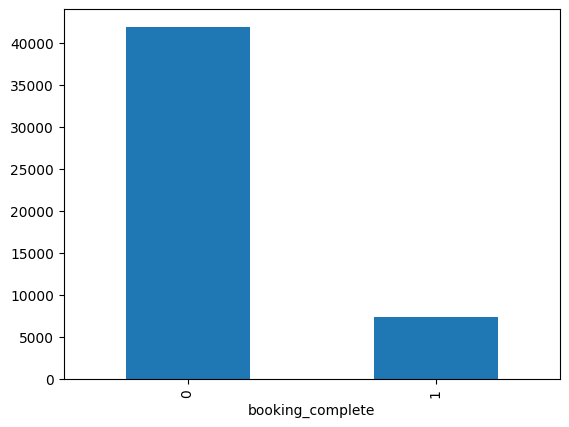

In [20]:
df['booking_complete'].value_counts().plot(kind='bar')

In [11]:
df['sales_channel'].value_counts()

sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64

In [24]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
      --------------------------------------- 0.2/8.3 MB 6.3 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/8.3 MB 8.9 MB/s eta 0:00:01
     ---- ----------------------------------- 0.9/8.3 MB 6.9 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/8.3 MB 6.4 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/8.3 MB 6.4 MB/s eta 0:00:02
     ----- ---------------------------------- 1.0/8.3 MB 3.9 MB/s eta 0:00:02
     ------ --------------------------------- 1.4/8.3 MB 4.6 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/8.3 MB 4.4 MB/s eta 0:00:02
     -------- ------------------------------- 1.7/8.3 MB 4.3 MB/s eta 0:00:02
     -------- ------------------------------- 1.8/8.3 MB 4.3 MB/s eta 0:00:02
     --------- ------------------------------ 2.0/8.3 MB 4.2 MB/s eta 0:00:02
     --------- ------------------------------ 2.0/8.3 MB 4.2 MB/s eta 0

In [28]:
#label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sales_channel'] = le.fit_transform(df['sales_channel'])

In [31]:
df['trip_type'].value_counts()

trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64

In [49]:
# label encoding
df['trip_type'] = le.fit_transform(df['trip_type'])

In [51]:
df['trip_type'].value_counts()

trip_type
2    48779
1      386
0      116
Name: count, dtype: int64

In [15]:
df['flight_day'].value_counts()

flight_day
Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: count, dtype: int64

In [52]:
# label encoding
df['flight_day'] = le.fit_transform(df['flight_day'])

In [53]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,2,112,20,3,2,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,2,243,22,17,6,AKLDEL,India,1,1,0,5.52,0
3,1,0,2,96,31,4,2,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,2,68,22,15,6,AKLDEL,India,1,0,1,5.52,0


In [54]:
# Model Training

In [66]:
x_new = df.drop(['booking_complete','route','booking_origin'],axis = 1)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
x = df.drop('booking_complete',axis = 1)

In [57]:
y = df['booking_complete']

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.3,random_state = 42)

In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [69]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
y_pred = rf.predict(x_test)

In [74]:
acc = accuracy_score(y_test,y_pred)
acc

0.8471423740277308

In [75]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [78]:
cv_scores = cross_val_score(rf, x_new, y)

In [79]:
cv_scores

array([0.84995435, 0.82751623, 0.77374188, 0.38666802, 0.40127841])

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12597
           1       0.36      0.04      0.07      2188

    accuracy                           0.85     14785
   macro avg       0.61      0.51      0.49     14785
weighted avg       0.78      0.85      0.79     14785



In [82]:
# Feature Importance

In [83]:
feature_importances = rf.feature_importances_

In [84]:
# Sort feature importances in descending order
indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)


In [91]:
feature_names = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration']

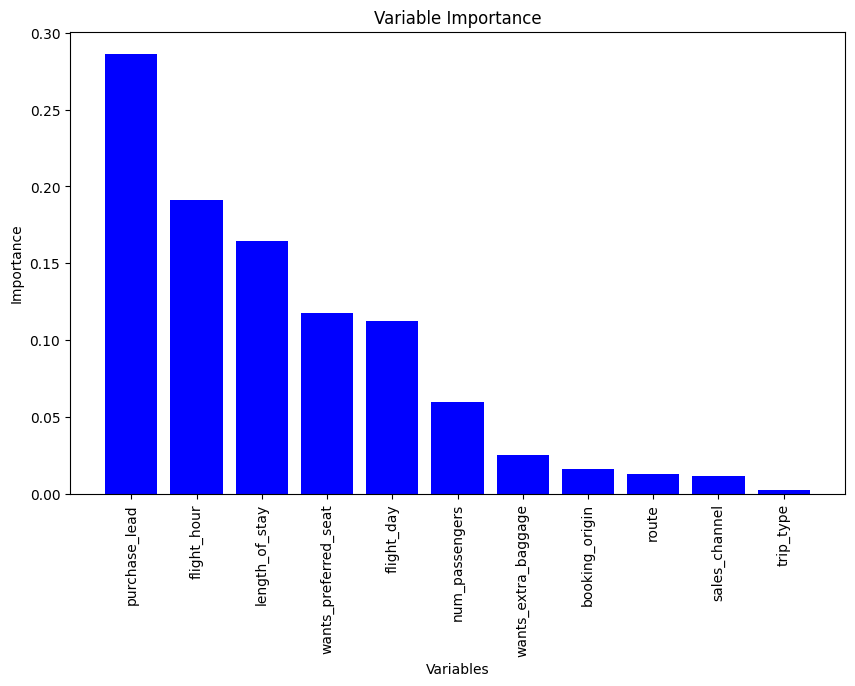

In [92]:
# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.title("Variable Importance")
plt.bar(range(len(feature_importances)), [feature_importances[i] for i in indices], color="b", align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

In [99]:
y_pred_prob = rf.predict_proba(x_test)[:, 1]

In [100]:
y_true = y_test

In [102]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

In [103]:
auc = roc_auc_score(y_true, y_pred_prob)

In [104]:
auc

0.6446746918501097

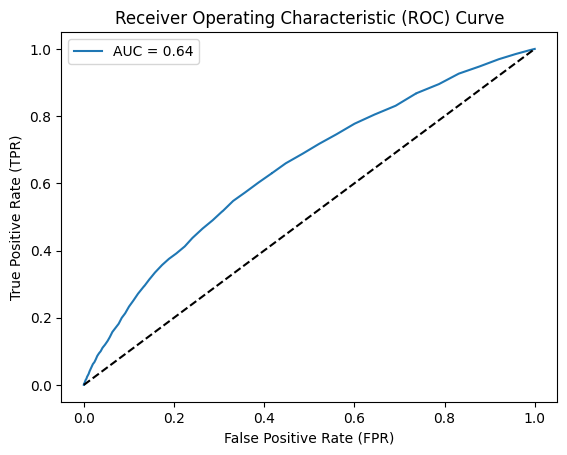

In [105]:
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()